# Importação das bibliotecas


In [31]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importação dos dados

In [33]:
df = pd.read_csv('/content/drive/Shareddrives/datasci4water/data/processed/IG/tabela_coletas.csv')
df = df.reset_index(drop=True)

# df = df.dropna(1)

df_values = df.iloc[:, 2:df.columns.size]

In [34]:
df_values.shape

(39, 68)

# Salvar os dados estatísticos

In [35]:
medianas = (df.describe()).iloc[5, :]

In [36]:
(df.describe()).to_csv('/content/drive/Shareddrives/datasci4water/data/processed/IG/dados_estatisticos.csv')

In [37]:
(df_values.corr()).to_csv('/content/drive/Shareddrives/datasci4water/data/processed/IG/matriz_correlacao.csv')

# Boxplot

## Elementos químicos
Pois esses tem o referencial do LD

In [38]:
limites = pd.read_csv('/content/drive/Shareddrives/datasci4water/data/processed/IG/limites_deteccao.csv')

In [39]:
limites = limites.reset_index(drop=True)
limites.shape

(57, 2)

In [40]:
# for i in range(limites.shape[0]):

#   fig = px.box(df, y=df_values.columns[i], width=500, height=500, hover_data=[df['well'], df['date']])
#   fig.update_layout(font=dict(size=15))
#   fig.layout.xaxis2 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
#   fig.add_scatter(x = [0, 2], y = [limites.iloc[i, 1], limites.iloc[i, 1]], mode='lines', xaxis='x2',
#                               showlegend=True, name='LD', line=dict(dash='dash', color = "firebrick", width = 2))
#   fig.layout.xaxis2 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
#   fig.add_scatter(x = [0, 2], y = [2*limites.iloc[i, 1], 2*limites.iloc[i, 1]], mode='lines', xaxis='x2',
#                               showlegend=True, name='2*LD', line=dict(dash='dash', color = "yellow", width = 2))
#   fig.add_scatter(x = [0, 2], y = [4*limites.iloc[i, 1], 4*limites.iloc[i, 1]], mode='lines', xaxis='x2',
#                               showlegend=True, name='LQ (4*LD)', line=dict(dash='dash', color = "green", width = 2))
#   fig.show()
  


#  Filtrando o que é  menor que o LQ

In [41]:
para_remover = []
for i in range(limites.shape[0]):
  if float(medianas.iloc[i]) < 4*float(limites.iloc[i, 1]):
    para_remover.append(limites.iloc[i, 0])
para_remover


['Be',
 'Sc',
 'Ti',
 'Se',
 'Zr',
 'Nb',
 'Ag',
 'Cd',
 'Sn',
 'Hf',
 'Ta',
 'W',
 'Bi',
 'Th']

In [42]:
tabela_LQ_filtrado = df.drop(columns=para_remover)
tabela_LQ_filtrado.shape

(39, 56)

In [43]:
tabela_LQ_filtrado.corr().to_csv('/content/drive/Shareddrives/datasci4water/data/processed/IG/matriz_correlacao_filtrado.csv')

## Heatmap da tabela filtrada

<Axes: >

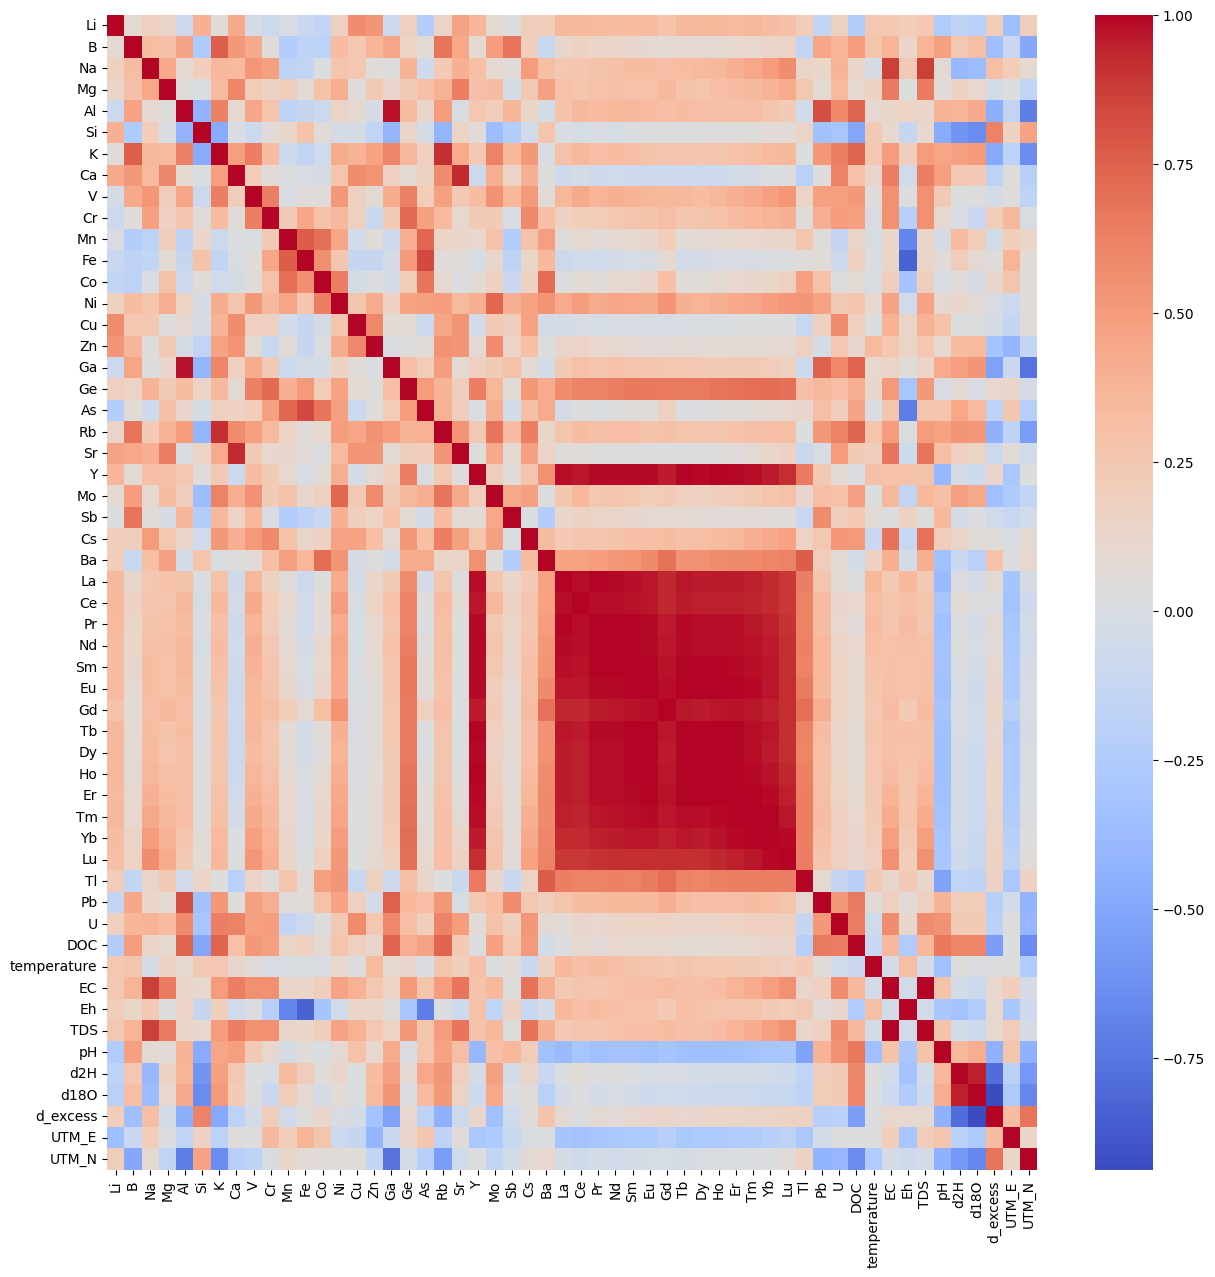

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(tabela_LQ_filtrado.corr(), cmap='coolwarm')


In [45]:
tabela_LQ_filtrado.corr()

,Li,B,Na,Mg,Al,Si,K,Ca,V,Cr,...,temperature,EC,Eh,TDS,pH,d2H,d18O,d_excess,UTM_E,UTM_N
Li,1.000000,0.091761,0.183582,0.140766,-0.096922,0.399723,0.055569,0.437803,-0.033468,-0.086598,...,0.255463,0.256832,0.210104,0.256410,-0.251425,-0.170283,-0.200552,0.212342,-0.357868,0.202065
B,0.091761,1.000000,0.324371,0.297941,0.467298,-0.257290,0.760640,0.521849,0.437295,0.057269,...,0.266288,0.378060,0.135239,0.377537,0.479146,0.251721,0.313309,-0.348351,-0.107329,-0.494512
Na,0.183582,0.324371,1.000000,0.443964,0.094476,0.208069,0.349186,0.340399,0.526384,0.479434,...,-0.029020,0.867337,0.237284,0.866863,0.079921,-0.393629,-0.376792,0.313256,0.206887,0.097278
Mg,0.140766,0.297941,0.443964,1.000000,0.052160,0.005909,0.335031,0.599481,0.202176,0.164008,...,0.174607,0.646252,0.030434,0.647260,0.064398,0.160931,0.109628,-0.037198,0.019455,-0.158207
Al,-0.096922,0.467298,0.094476,0.052160,1.000000,-0.423959,0.623215,0.094799,0.454131,0.279214,...,0.095792,0.131248,0.158168,0.132069,0.386991,0.379327,0.436998,-0.453054,-0.156952,-0.705877
Si,0.399723,-0.257290,0.208069,0.005909,-0.423959,1.000000,-0.479901,0.001365,-0.093400,0.058632,...,0.237847,0.110219,-0.124367,0.109719,-0.477735,-0.602460,-0.643614,0.616362,0.165071,0.464455
K,0.055569,0.760640,0.349186,0.335031,0.623215,-0.479901,1.000000,0.491458,0.632106,0.328321,...,0.244815,0.503844,0.193359,0.503949,0.456646,0.481910,0.513537,-0.490386,-0.183752,-0.638270
Ca,0.437803,0.521849,0.340399,0.599481,0.094799,0.001365,0.491458,1.000000,0.216109,0.068953,...,0.115603,0.634982,-0.064861,0.634831,0.486432,0.251141,0.233714,-0.186185,0.043546,-0.217895
V,-0.033468,0.437295,0.526384,0.202176,0.454131,-0.093400,0.632106,0.216109,1.000000,0.634553,...,0.046833,0.557992,0.023704,0.558134,0.238618,0.030333,0.033807,-0.033902,0.045618,-0.167048
Cr,-0.086598,0.057269,0.479434,0.164008,0.279214,0.058632,0.328321,0.068953,0.634553,1.000000,...,-0.000904,0.555559,-0.214498,0.556225,0.105957,-0.011677,-0.105222,0.201692,0.345420,-0.013017


In [46]:
correlacoes = tabela_LQ_filtrado.corr().where(np.triu(np.ones(tabela_LQ_filtrado.corr().shape)).astype(bool)).unstack().reset_index()


correlacoes.columns = ['variavel1', 'variavel2', 'correlacao']



correlacoes = correlacoes[(correlacoes['correlacao'] > 0.6) | (correlacoes['correlacao'] < -0.6)]
correlacoes = correlacoes[(correlacoes['correlacao'] != 1.0)]
correlacoes.to_csv('/content/drive/Shareddrives/datasci4water/data/processed/IG/correlacoes.csv', index=False)

correlacoes

,variavel1,variavel2,correlacao
325,K,B,0.760640
328,K,Al,0.623215
438,V,K,0.632106
494,Cr,V,0.634553
604,Fe,Mn,0.771891
...,...,...,...
2868,UTM_N,K,-0.638270
2878,UTM_N,Ga,-0.760192
2905,UTM_N,DOC,-0.642719
2912,UTM_N,d18O,-0.666272


In [47]:
# tabela_LQ_filtrado_sem_coord = tabela_LQ_filtrado.drop(columns=['UTM_E', 'UTM_N'])

In [48]:
(limites.iloc[:, 0]).values

array(['Li', 'Be', 'B', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Sc', 'Ti',
       'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As',
       'Se', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Ag', 'Cd', 'Sn', 'Sb',
       'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Tl', 'Pb', 'Bi',
       'Th', 'U'], dtype=object)

In [49]:
novo_limite = limites.set_index('Elemento').T
novo_limite = novo_limite.drop(columns=para_remover)
novo_limite.to_csv('/content/drive/Shareddrives/datasci4water/data/processed/IG/limites_filtrados.csv')

In [50]:
novo_limite

Elemento,Li,B,Na,Mg,Al,Si,K,Ca,V,Cr,...,Tb,Dy,Ho,Er,Tm,Yb,Lu,Tl,Pb,U
Limite,0.01,1.2,2.0,0.2,0.4,913.0,47.0,9.0,0.003,0.01,...,0.0003,0.001,0.0002,0.0005,0.0002,0.0003,0.0002,0.0003,0.002,0.002


In [51]:
tabela_LQ_filtrado.iloc[0, novo_limite.size+1]

0.004

In [52]:
for i in range(2,  novo_limite.size+2):
  print(tabela_LQ_filtrado.columns[i], novo_limite.iloc[0, i-2])
  fig = px.box(tabela_LQ_filtrado, y=tabela_LQ_filtrado.columns[i], width=500, height=500, hover_data=[tabela_LQ_filtrado['well'], tabela_LQ_filtrado['date']])
  fig.update_layout(font=dict(size=15))


  # fig.layout.xaxis2 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
  # fig.add_scatter(x = [0, 2], y = [20, 20], mode='lines', xaxis='x2', showlegend=False, line=dict(dash='dash', color = "firebrick", width = 2))

  fig.layout.xaxis2 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
  fig.add_scatter(x = [0, 2], y = [novo_limite.iloc[0, i-2], novo_limite.iloc[0, i-2]], mode='lines', xaxis='x2',
                              showlegend=True, name='LD', line=dict(dash='dash', color = "firebrick", width = 2))
  fig.layout.xaxis2 = go.layout.XAxis(overlaying='x', range=[0, 2], showticklabels=False)
  fig.add_scatter(x = [0, 2], y = [2*novo_limite.iloc[0, i-2], 2*novo_limite.iloc[0, i-2]], mode='lines', xaxis='x2',
                              showlegend=True, name='2*LD', line=dict(dash='dash', color = "yellow", width = 2))
  fig.add_scatter(x = [0, 2], y = [4*novo_limite.iloc[0, i-2], 4*novo_limite.iloc[0, i-2]], mode='lines', xaxis='x2',
                              showlegend=True, name='LQ (4*LD)', line=dict(dash='dash', color = "green", width = 2))
  fig.show()
  

Li 0.01


B 1.2


Na 2.0


Mg 0.2


Al 0.4


Si 913.0


K 47.0


Ca 9.0


V 0.003


Cr 0.01


Mn 0.03


Fe 1.6


Co 0.006


Ni 0.04


Cu 0.05


Zn 0.1


Ga 0.001


Ge 0.001


As 0.005


Rb 0.01


Sr 0.009


Y 0.005


Mo 0.004


Sb 0.001


Cs 0.0005


Ba 0.009


La 0.006


Ce 0.007


Pr 0.001


Nd 0.005


Sm 0.001


Eu 0.0005


Gd 0.001


Tb 0.0003


Dy 0.001


Ho 0.0002


Er 0.0005


Tm 0.0002


Yb 0.0003


Lu 0.0002


Tl 0.0003


Pb 0.002


U 0.002


## Demais boxplots
Referentes aos outros parâmetros


In [53]:
for i in range(novo_limite.size +2, tabela_LQ_filtrado.columns.size):

  fig = px.box(tabela_LQ_filtrado, y=tabela_LQ_filtrado.columns[i], width=500, height=500, hover_data=[tabela_LQ_filtrado['well'], tabela_LQ_filtrado['date']])
  fig.update_layout(font=dict(size=15))
  fig.show()


  